<a href="https://colab.research.google.com/github/Mbacanudo/Fraud_Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datos Personales

* **Nombre**: Mario Eduardo Navarro Montero
* **DataSet**: Fraud Detection


##Detección de fraude
###Objetivos:
Analizar la información de una tarjeta de crédito para predecir si una transacción fue fraudulenta o no. Es importante que las compañías de tarjetas de crédito puedan reconocer transacciones de tarjetas de crédito fraudulentas para que no se cobre a los clientes por artículos que no compraron.

###Tareas para este conjunto de datos:

- Limpiar el conjunto de datos
- Distintos tipos de visualizaciones para comprender mejor el conjunto de datos
- Manejar las variables categóricas para prepararte para el aprendizaje automático
- Determinar qué características incluir en tu modelo o cómo preparar mejor el modelo para el aprendizaje automático.
- Construir modelos de aprendizaje automático para predecir fraudes (`Class`).
- Generar predicciones del conjunto de datos de prueba retenido utilizando el modelo y calcular la precisión de prueba (o validación cruzada).

## Descripción del Problema

| Variable | Descripción                                                                                                                                                                                | Tipo de dato |
|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------|
| Time     | Los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos                                                                                         | flotante     |
| V1 - V28 | Los componentes principales obtenidos con ACP (debido a problemas de confidencialidad, no podemos proporcionar las características originales y más información de fondo sobre los datos). | flotante     |
| Amount   | El monto de la transacción                                                                                                                                                                 | flotante     |
| Class    | La variable objetivo para predecir: 1 en caso de fraude, 0 si no                                                                                                                           | int          |

## Solución

### I.- Análisis Exploratorio

#### Manipulación de datos

In [ ]:
# Librerías

import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, r2_score, mean_absolute_error, mean_squared_error, roc_auc_score, RocCurveDisplay, roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
pd.options.display.max_columns = None
file = "/content/creditcard.csv"
df = pd.read_csv(file)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
284807-1081

283726

In [ ]:
print("------------------------------------------------------\n")
print("Información relevante:\n")
print(f"Número de columnas: {df.shape[1]}\n")
print(f"Número de filas: {df.shape[0]}\n")
print(f"Número de elementos duplicados: {df.duplicated().sum()}\n")
print(f"Número de valores nulos: {df.isna().sum().sum()}\n")
print("------------------------------------------------------\n")
print("Valores nulos por cada columna:\n")
print(df.isna().sum())
print("\n")
print("------------------------------------------------------\n")

------------------------------------------------------

Información relevante:

Número de columnas: 31

Número de filas: 284807

Número de elementos duplicados: 1081

Número de valores nulos: 0

------------------------------------------------------

Valores nulos por cada columna:

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


------------------------------------------------------



In [ ]:
print(f"Porcentaje total de valores duplicados: {round((df.duplicated().sum()/len(df))*100, 2)}%")

Porcentaje total de valores duplicados: 0.38%


In [ ]:
df.drop_duplicates(keep='first', inplace=True)
print(f"Porcentaje total de valores duplicados: {round((df.duplicated().sum()/len(df))*100, 2)}%")

Porcentaje total de valores duplicados: 0.0%


In [ ]:
print("------------------------------------------------------\n")
print("Información de la variable objetivo ['Class']:\n")
print(f"Número total de elementos: {df.shape[0]}\n")
print(f"Número de elementos clase 0: {df['Class'].value_counts()[0]}\n")
print(f"Número de elementos clase 1 (fraude): {df['Class'].value_counts()[1]}\n")
print("------------------------------------------------------\n")

------------------------------------------------------

Información de la variable objetivo ['Class']:

Número total de elementos: 283726

Número de elementos clase 0: 283253

Número de elementos clase 1 (fraude): 473

------------------------------------------------------



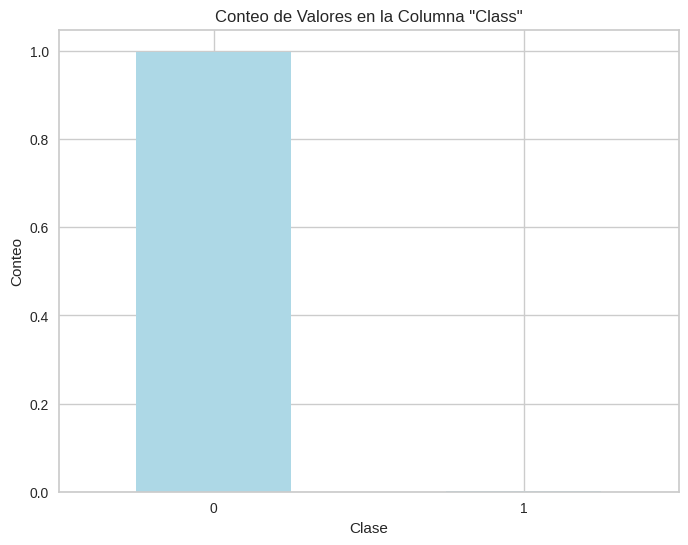



------------------------------------------------------

Porcentaje de clases:

Clase 0: 99.8%

Clase 1: 0.2%

------------------------------------------------------



In [ ]:
conteo_clases = df['Class'].value_counts(normalize=True)

conteo_clases.plot(kind='bar', color='lightblue', figsize=(8, 6))
plt.title('Conteo de Valores en la Columna "Class"')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
plt.show()

print("\n")
print("------------------------------------------------------\n")
print("Porcentaje de clases:\n")
print(f"Clase 0: {round(df['Class'].value_counts(normalize=True)[0], 3)*100}%\n")
print(f"Clase 1: {round(df['Class'].value_counts(normalize=True)[1], 3)*100}%\n")
print("------------------------------------------------------\n")

Conclusiones Intermedias:

- Podemos ver que existe un total de 1081 elementos duplicados dentro del dataset con un tamaño de 284807 filas y 31 columnas. Estos elementos duplicados representan el 0.38%

- Tambien por la estadistica descriptiva vista por describe podemos ver que existen bastantes outliers en las columnas (V), por lo que una forma de que los podamos manejar es definiendo cuartiles para las columnas (V).

- El conjunto presenta una columna objetivo a predecir la cual es 'Class' en este caso utilizaremos modelos de clasificación por la naturaleza de la columna objetivo ademas podemos ver que existe un desbalance en la clase donde, 284315 elementos corresponden a clase 0 (99,8%) y 492 elementos a la clase 1 que corresponde a fraude (0,2%).

- En este caso la medida correcta para analizar el modelo seria por el recall, ademas utilizaremos matriz de confusion, curva roc y clasification report.

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


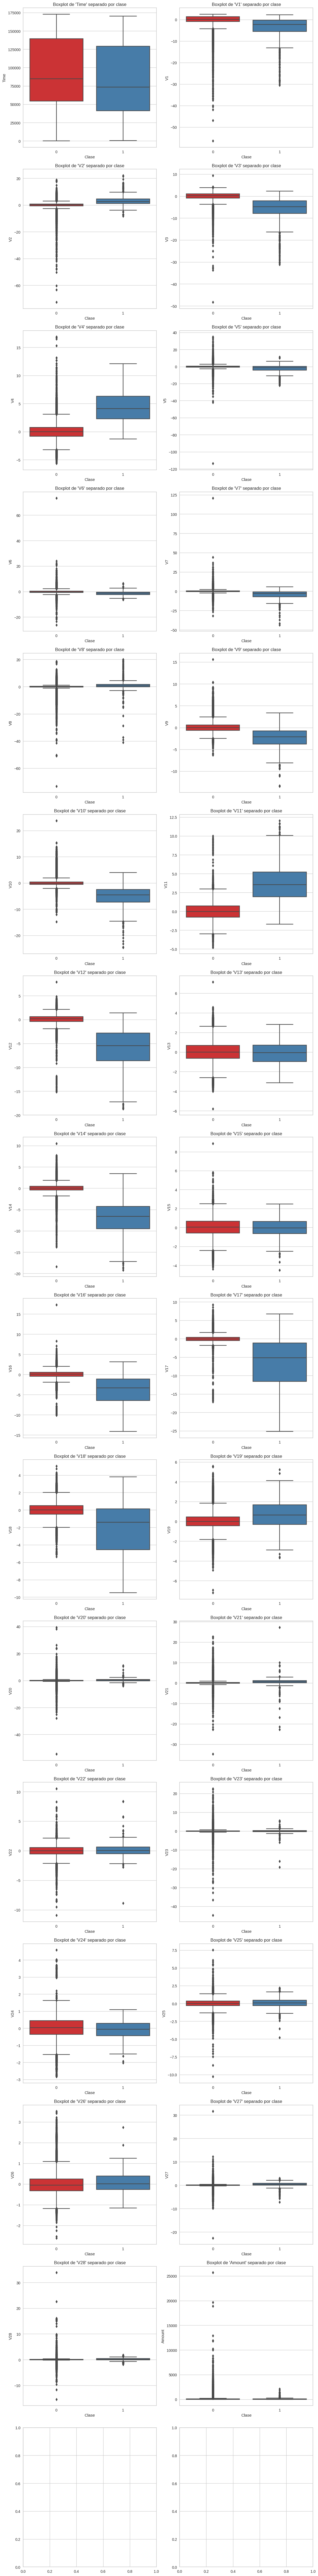

In [ ]:
columnas_para_visualizar = [col for col in df.columns if col != "Class"]
print(columnas_para_visualizar)


n_filas = 16
n_columnas = 2
fig, axs = plt.subplots(n_filas, n_columnas, figsize=(12, 6 * n_filas))


for i, columna in enumerate(columnas_para_visualizar):
    fila_actual = i // n_columnas
    columna_actual = i % n_columnas

    sns.boxplot(x="Class", y=columna, data=df, palette="Set1", ax=axs[fila_actual, columna_actual])
    axs[fila_actual, columna_actual].set_title(f"Boxplot de '{columna}' separado por clase")
    axs[fila_actual, columna_actual].set_xlabel("Clase")
    axs[fila_actual, columna_actual].set_ylabel(columna)

plt.tight_layout()
plt.show()

In [ ]:
df_clase = df[['Class']]
df.drop(columns='Class', inplace=True)

In [ ]:
ancho = 1.5

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (ancho * iqr)
    upper = q3 + (ancho * iqr)

    df[col] = df[col].clip(lower=lower, upper=upper)

In [ ]:
df['Class'] = df_clase['Class']

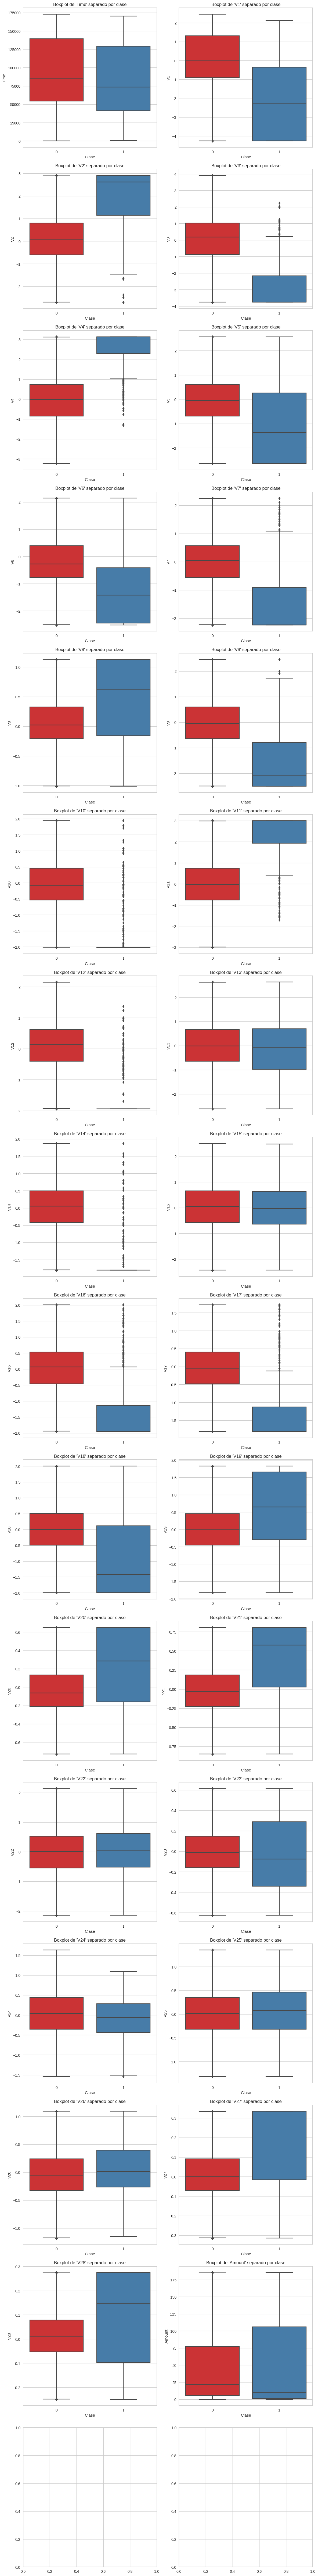

In [ ]:
columnas_para_visualizar = [col for col in df.columns if col != "Class"]

n_filas = 16
n_columnas = 2

fig, axs = plt.subplots(n_filas, n_columnas, figsize=(12, 6 * n_filas))

for i, columna in enumerate(columnas_para_visualizar):
    fila_actual = i // n_columnas
    columna_actual = i % n_columnas

    sns.boxplot(x="Class", y=columna, data=df, palette="Set1", ax=axs[fila_actual, columna_actual])
    axs[fila_actual, columna_actual].set_title(f"Boxplot de '{columna}' separado por clase")
    axs[fila_actual, columna_actual].set_xlabel("Clase")
    axs[fila_actual, columna_actual].set_ylabel(columna)

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.079902,0.046775,0.027858,-0.030700,-0.001586,-0.092059,0.009550,0.067589,-0.016661,-0.030919,-0.002976,0.039064,-0.000555,0.023067,0.003458,0.013729,-0.004975,0.005114,-0.004257,-0.027943,-0.015089,0.001708,-0.004527,0.002329,0.003511,-0.003944,0.012986,0.011289,51.893200,0.001667
std,47481.047891,1.590245,1.119493,1.368971,1.309182,1.075933,1.001754,0.863909,0.484007,1.018057,0.823942,1.001928,0.843285,0.984204,0.783905,0.903508,0.805718,0.672850,0.801876,0.758302,0.317533,0.323652,0.707221,0.266866,0.594252,0.492971,0.467431,0.164936,0.124060,61.913921,0.040796
min,0.000000,-4.263980,-2.701226,-3.764645,-3.234807,-2.642901,-2.517765,-2.236984,-1.010627,-2.504517,-2.019373,-3.013492,-1.940959,-2.614423,-1.802834,-2.428786,-1.952416,-1.808277,-1.997969,-1.828484,-0.728484,-0.850053,-2.149117,-0.625881,-1.545741,-1.319714,-1.177300,-0.313414,-0.249459,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,2.901188,3.901923,3.124319,2.565290,2.145527,2.254949,1.127502,2.456273,1.937414,2.991422,2.151738,2.629739,1.869438,2.497438,2.009068,1.723321,2.001911,1.830703,0.650222,0.807941,2.134663,0.611926,1.631026,1.352896,1.090798,0.333982,0.274917,185.375000,1.000000


**Conclusiones Intermedias**:

- Luego de ver la distribución de los datos originales, los tratamos a traves de los cuartiles para reemplazar los outliers.

- Como resultado podemos ver una clara diferencia una vez tratada la distribucion de los datos, aunque estadisticamente no hubo un cambio significativo.

### II.- Modelos

En este caso al ser un problema de clasificación utilizaremos 2 modelos, LogisticRegression y uno de redes neuronales.

Por ultimo vamos a medir sus metricas poniendo enfasis en el recall al ser un problema de clases desbalanceadas como observamos en los análisis anteriores.

###LogisticRegression

In [ ]:
# Dividir los datos
y = df['Class']
X = df.drop(columns='Class')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Tubería
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# Instanciamos escalador y encoder
scaler = StandardScaler()
ohe = OneHotEncoder()

num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

# Aplicamos a los datos de entrenamiento
col_transformer.fit(X_train)

# Transformamos finalmente los datos
X_train = col_transformer.transform(X_train)
X_val = col_transformer.transform(X_val)
X_test = col_transformer.transform(X_test)

In [ ]:
# Parametros
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']}

# GridSearchCV
grid = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, refit=True, verbose=2, cv=5)

# Ajustamos el GridSearchCV en el conjunto de entrenamiento
grid.fit(X_train, y_train)

# Mejor modelo encontrado por GridSearchCV
best_model = grid.best_estimator_
print(best_model)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ..............C=0.001, penalty=l1, sol

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=  13.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=  15.5s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   2.3s
[CV] END ...............C=0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=  13.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=  13.2s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   3.4s
[CV] END ................C=0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=  27.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=  14.8s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   3.1s
[CV] END ..................C

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time=  18.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time=  13.5s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   4.5s
[CV] END .................C=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time=  13.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver

[CV] END .......................C=10, penalty=l2, solver=sag; total time=  12.9s
LogisticRegression(C=0.001, class_weight='balanced', solver='newton-cg')


###Conjunto de Validación

In [ ]:
# Predicciones en el conjunto de validación
y_val_pred = best_model.predict(X_val)

# Precisión en el conjunto de validación
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Precisión en el conjunto de validación: {accuracy:.2f}\n")

# Classification Report
class_report = classification_report(y_val, y_val_pred)
print("Classification Report en el conjunto de validación:\n", class_report,"\n")

# Probabilidades de clase para la curva ROC
y_val_prob = best_model.predict_proba(X_val)[:, 1]

# Puntuación AUC-ROC en el conjunto de validación
roc_auc = roc_auc_score(y_val, y_val_prob)
print(f"AUC-ROC Score en el conjunto de validación: {roc_auc:.2f}")

# Calculamos la curva ROC para el conjunto de validación
fpr, tpr, _ = roc_curve(y_val, y_val_prob)

Precisión en el conjunto de validación: 0.97

Classification Report en el conjunto de validación:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     42493
           1       0.05      0.86      0.10        66

    accuracy                           0.97     42559
   macro avg       0.53      0.92      0.54     42559
weighted avg       1.00      0.97      0.99     42559
 

AUC-ROC Score en el conjunto de validación: 0.97


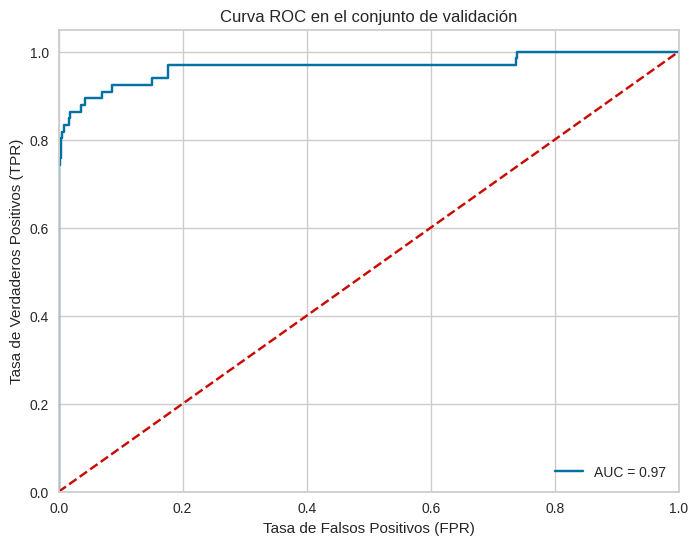

In [ ]:
# Visualización de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC en el conjunto de validación')
plt.legend(loc="lower right")
plt.show()

###Conjunto de Prueba


In [ ]:
# Predicciones en el conjunto de prueba
y_test_pred = best_model.predict(X_test)

# Precisión en el conjunto de prueba
accuracy = accuracy_score(y_val, y_test_pred)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}\n")

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report en el conjunto de pruyeba:\n", class_report,"\n")

# Probabilidades de clase para la curva ROC
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Puntuación AUC-ROC en el conjunto de prueba
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"AUC-ROC Score en el conjunto de prueba: {roc_auc:.2f}")

# Calculamos la curva ROC para el conjunto de prueba
fpr, tpr, _ = roc_curve(y_test, y_test_prob)

Precisión en el conjunto de prueba: 0.97

Classification Report en el conjunto de pruyeba:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     42491
           1       0.06      0.93      0.11        68

    accuracy                           0.98     42559
   macro avg       0.53      0.95      0.55     42559
weighted avg       1.00      0.98      0.99     42559
 

AUC-ROC Score en el conjunto de prueba: 0.99


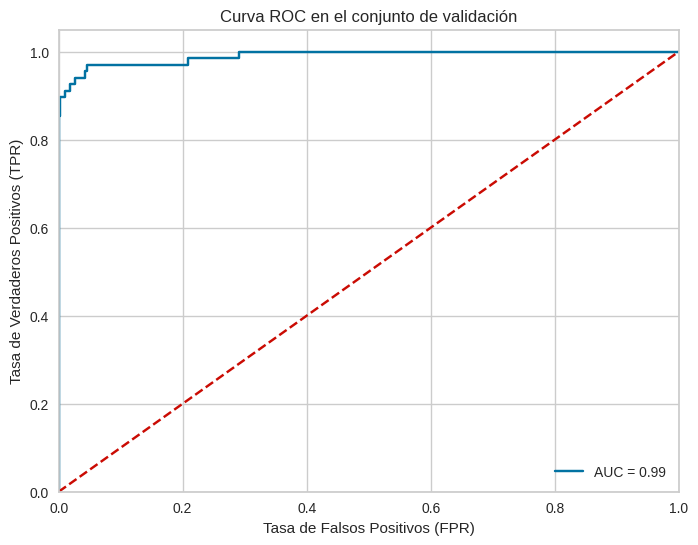

In [ ]:
# Visualización de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC en el conjunto de validación')
plt.legend(loc="lower right")
plt.show()

###Matriz de Confusión Val/Test

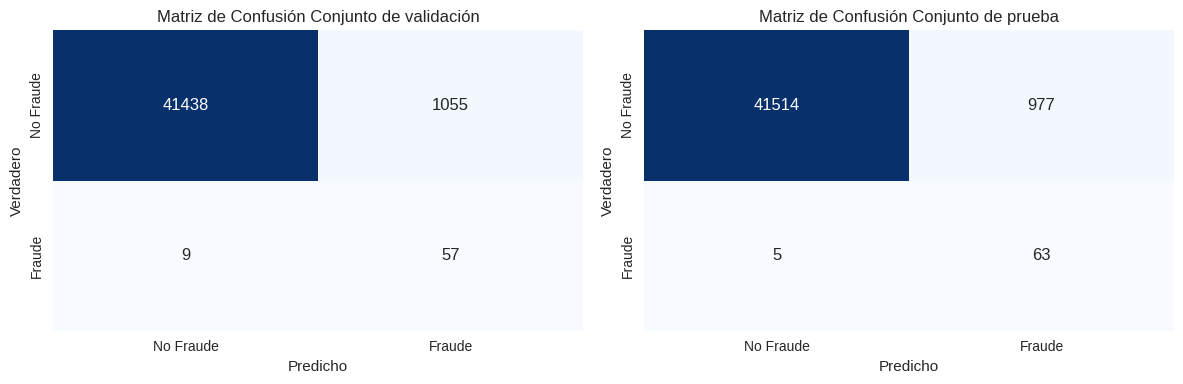

In [ ]:
# Matriz de confusión conjunto de validación
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

# Matriz de confusión conjunto de prueba
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Visualización de la matriz de confusión en el conjunto de validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Conjunto de validación')

# Visualización de la matriz de confusión en el conjunto de prueba
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Conjunto de prueba')

plt.tight_layout()
plt.show()

**Conclusiones Intermedias**:

- - Utilizamos el transformador de columnas por defecto en este caso, aunque se ve un OHE, este no tiene impacto, ya que no existen filas categoricas.

- Al ser un dataset desbalanceado y viendo los resultados de las metricas podemos decir que entre el conjunto de validación con el conjunto de prueba el recall tuvo una mejoria, no olvidemos que esta metrica nos indica la capacidad que tiene el modelo para capturar las instancias de las clases. Podemos ver que de 0.86 tuvo una mejoria y subio a 0.93 para la clase 1 pero para la clase 0 se mantiene.

- El AUC ROC Score nos indica que el modelo tiene una capacidad para discriminar entre clases muy buena.

- Podemos concluir que entre ambos conjuntos, una vez realizado el entrenamiento en el conjunto de prueba el modelo tuvo una mejora segun su puntuacion en recall y que lo vemos reflejado en la matriz de confusion.



###Redes Neuronales

In [ ]:
# Dividir los datos
y = df['Class']
X = df.drop(columns='Class')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Tubería
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# Instanciamos escalador y encoder
scaler = StandardScaler()
ohe = OneHotEncoder()

num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

# Aplicamos a los datos de entrenamiento
col_transformer.fit(X_train)

# Transformamos finalmente los datos
X_train = col_transformer.transform(X_train)
X_val = col_transformer.transform(X_val)
X_test = col_transformer.transform(X_test)

In [ ]:
X.shape

(283726, 30)

In [ ]:
# Instanciamos el modelo
model = Sequential()

model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
early_stopping = EarlyStopping(patience = 5)

# Compilamos el modelo
model.compile(loss='bce', optimizer='adam', metrics=['Recall'])

# Entrenamiento del modelo
history_earlystop = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=100,
                    callbacks = [early_stopping])

# Predicciones en el conjunto de validación
y_val_prob = model.predict(X_val)
print(y_val_prob)

# Predicciones en el conjunto de prueba
y_test_prob = model.predict(X_test)

Epoch 1/100
6207/6207 [==============================] - 17s 3ms/step - loss: 0.0068 - recall: 0.6991 - val_loss: 0.0040 - val_recall: 0.5758
Epoch 2/100
6207/6207 [==============================] - 15s 2ms/step - loss: 0.0030 - recall: 0.7581 - val_loss: 0.0042 - val_recall: 0.7121
Epoch 3/100
6207/6207 [==============================] - 15s 2ms/step - loss: 0.0026 - recall: 0.7670 - val_loss: 0.0040 - val_recall: 0.7273
Epoch 4/100
6207/6207 [==============================] - 16s 3ms/step - loss: 0.0024 - recall: 0.7699 - val_loss: 0.0039 - val_recall: 0.6667
Epoch 5/100
6207/6207 [==============================] - 16s 3ms/step - loss: 0.0023 - recall: 0.7788 - val_loss: 0.0040 - val_recall: 0.6515
Epoch 6/100
6207/6207 [==============================] - 16s 3ms/step - loss: 0.0021 - recall: 0.7847 - val_loss: 0.0045 - val_recall: 0.7121
Epoch 7/100
6207/6207 [==============================] - 15s 2ms/step - loss: 0.0020 - recall: 0.8053 - val_loss: 0.0037 - val_recall: 0.6364
Epoch 

In [ ]:
y_val_pred = (y_val_prob > 0.5).astype(int)
y_test_pred = (y_test_prob > 0.5).astype(int)

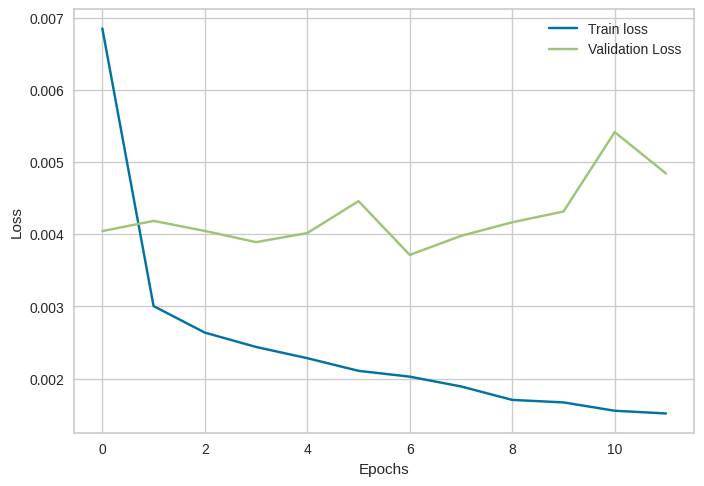

In [ ]:
# Visualización de perdida
plt.plot(history_earlystop.history['loss'], label='Train loss')
plt.plot(history_earlystop.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

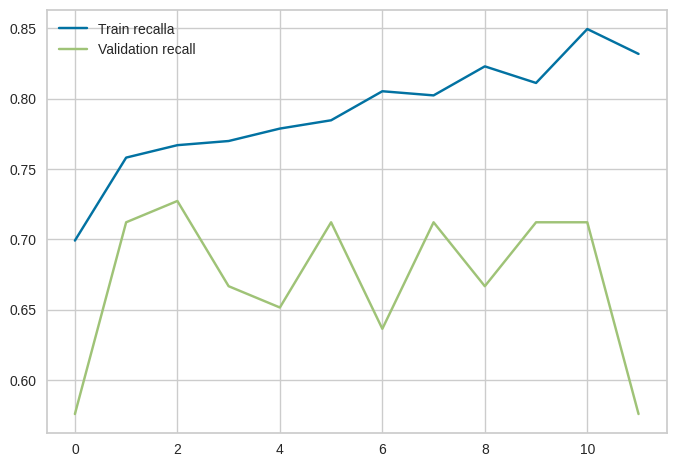

In [ ]:
# Visualizar de recall
plt.plot(history_earlystop.history['recall'], label='Train recalla')
plt.plot(history_earlystop.history['val_recall'], label='Validation recall')
plt.legend();

###Conjunto de Validación

In [ ]:
# Evaluación del modelo conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Precisión en el conjunto de validación: {val_accuracy:.2f}')

# Classification Report del conjunto de validación
class_report_val = classification_report(y_val, y_val_pred)
print("Classification Report en el conjunto de validación:\n", class_report_val)

# Puntuación AUC-ROC del conjunto de validación
roc_auc_val = roc_auc_score(y_val, y_val_prob)
print(f'AUC-ROC Score en el conjunto de validación: {roc_auc_val:.2f}')

1330/1330 [==============================] - 2s 2ms/step - loss: 0.0048 - recall: 0.5758
Precisión en el conjunto de validación: 0.58
Classification Report en el conjunto de validación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42493
           1       0.95      0.58      0.72        66

    accuracy                           1.00     42559
   macro avg       0.97      0.79      0.86     42559
weighted avg       1.00      1.00      1.00     42559

AUC-ROC Score en el conjunto de validación: 0.95


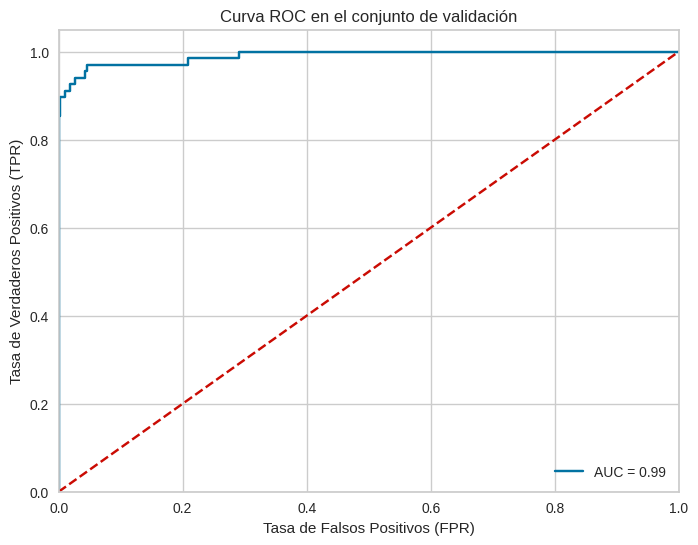

In [ ]:
# Calculamos la curva ROC del conjunto de validación
fpr_val, tpr_val, _val = roc_curve(y_val, y_val_prob)

# Visualización de la curva ROC del conjunto de validación
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC en el conjunto de validación')
plt.legend(loc="lower right")
plt.show()

###Conjunto de Prueba

In [ ]:
# Evaluamos el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_accuracy:.2f}')

# Classification Report del conjunto de prueba
class_report = classification_report(y_test, y_test_pred)
print("Classification Report en el conjunto de prueba:\n", class_report)

# Calculamos la puntuación AUC-ROC del conjunto de prueba
roc_auc_test = roc_auc_score(y_test, y_test_prob)
print(f'AUC-ROC Score en el conjunto de prueba: {roc_auc_test:.2f}')

1330/1330 [==============================] - 2s 2ms/step - loss: 0.0036 - recall: 0.6029
Precisión en el conjunto de prueba: 0.60
Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42491
           1       0.93      0.60      0.73        68

    accuracy                           1.00     42559
   macro avg       0.97      0.80      0.87     42559
weighted avg       1.00      1.00      1.00     42559

AUC-ROC Score en el conjunto de prueba: 0.97


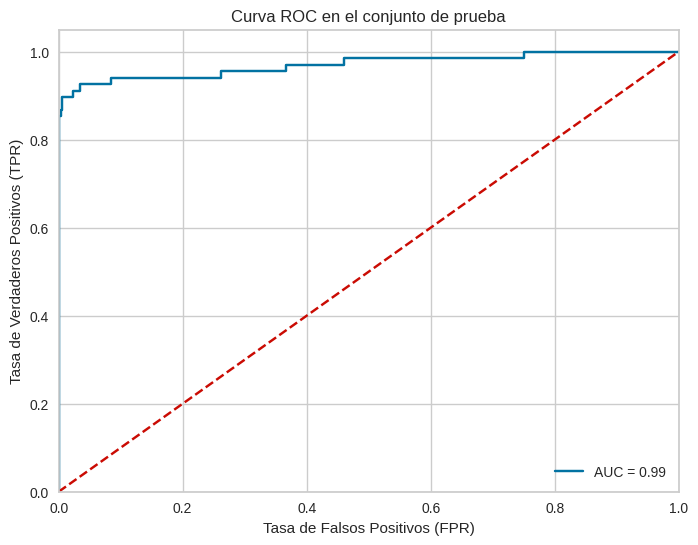

In [ ]:
# Calculamos la curva ROC en el conjunto de prueba
fpr, tpr, _ = roc_curve(y_test, y_test_prob)

# Visualización de la curva ROC del conjunto de prueba
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC en el conjunto de prueba')
plt.legend(loc="lower right")
plt.show()

###Matriz de Confusión Val/Test

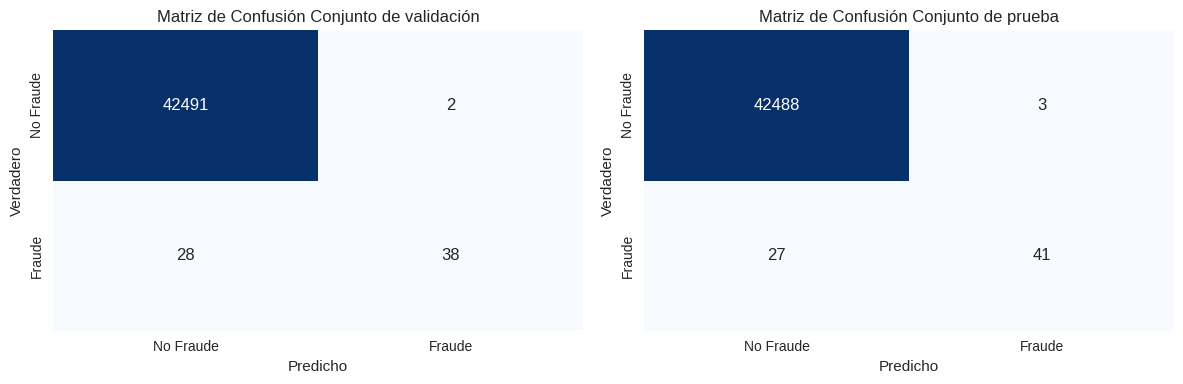

In [ ]:
# Matriz de confusión conjunto de validación
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

# Matriz de confusión conjunto de prueba
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Visualización de la matriz de confusión en el conjunto de validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Conjunto de validación')

# Visualización de la matriz de confusión en el conjunto de prueba
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Conjunto de prueba')

plt.tight_layout()
plt.show()

**Conclusiones Intermedias**:

- Utilizamos el transformador de columnas por defecto en este caso, aunque se ve un OHE, este no tiene impacto, ya que no existen filas categoricas.

- En este modelo vemos que el recall para la clase 0 es del 100%, lo que indica que es capaz de capturar todas las instancias de la clase 0. Sin embargo, el recall de la clase 1 es del 60% lo que significa que el modelo es capaz de capturar el 60& de las instancias reales de la clase 1.

- El AUC-ROC Score del modelo es del 0.97 lo que indica que tiene un buen poder para discriminar entre clases, en este caso es similar al modelo anterior.

- Para este modelo realizamos varias pruebas reiniciando el kernel en el que aumentabamos la cantidad de neuronas por capaz, al ser un modelo de clasificación utilizamos bce, y al ser desbalanceado utilizamos la metrica "recall".

##**Conclusiones Finales**:

- Segun las metricas utilizadas para evaluar ambos modelos podemos ver que el modelo de clasificación de regresión logistica tuvo mejor recall en comparación al modelo de redes neuronales (0.93 v/s 0.60 para la clase 1).

- Aunque el modelo de redes neuronales fue capaz de identificar el 100% de la clase 0 en este caso no olvidemos que es un conjunto de datos desbalanceado.

- En caso de que se hubiera mejorado la regularización para el modelo de ANN pudo haber sido superior al modelo de RL.

Como notas finales podemos realizar aun mas prueba y mejorar el tratamiento de datos para poder definir realmente cual modelo es mejor, como tratar correctamente el desbalanceo a traves de oversampling o undersampling, asignarles peso a las clases, etc.